In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist["data"], mnist["target"]
print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (70000, 784)
Y shape: (70000,)


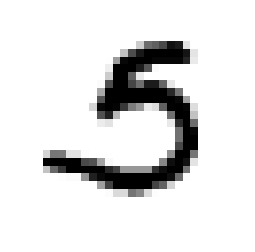

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[31002]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

plt.axis('off')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# shuffle the data
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [5]:
# binary classifier for the digit 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [6]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [7]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [8]:
y_pred = sgd_clf.predict(X_test)
n_correct = sum(y_pred == y_test_5)
print(n_correct/len(y_pred))

0.9706


In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9649,  0.9569,  0.9368])

In [10]:
from stupid_classifier import StupidClassifier

never_5_clf = StupidClassifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9098 ,  0.90785,  0.9113 ])

In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [12]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_train_5, y_train_pred)

In [13]:
tp = cf[1][1]
fp = cf[0][1]

precision = tp / (tp + fp)
print('Precision:', precision)

Precision: 0.70337254902


In [14]:
fn = cf[1][0]
recall = tp / (tp + fn)

print('Recall:', recall)

Recall: 0.827153661686


In [15]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.70337254901960788

In [16]:
recall_score(y_train_5, y_train_pred)

0.82715366168603577

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.76025771447948465

In [18]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 43654.82541633])

In [19]:
threshold = 300000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [20]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [21]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

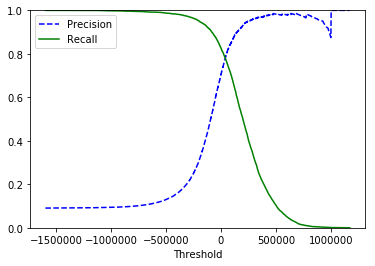

In [22]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

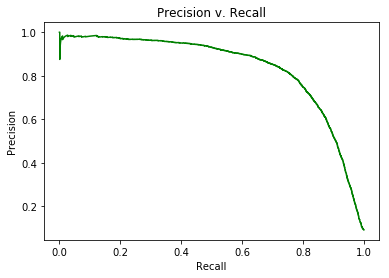

In [23]:
plt.plot(recalls[:-1], precisions[:-1], "g-")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision v. Recall')

In [24]:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_5, y_train_pred_90)

0.82557417752948481

In [25]:
recall_score(y_train_5, y_train_pred_90)

0.73602656336469285

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

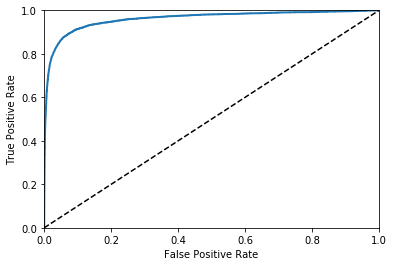

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()
    

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.96120215649863194

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [30]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, threhold_forest = roc_curve(y_train_5, y_scores_forest)


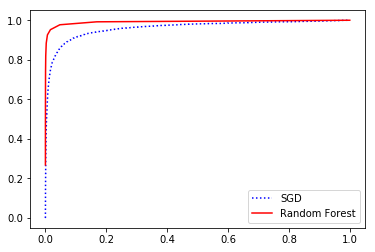

In [31]:
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, "r-", label="Random Forest")
plt.legend(loc="lower right")
plt.show()

In [32]:
roc_auc_score(y_train_5, y_scores_forest)

0.99221798077057854

In [33]:
y_forest_bin = (y_scores_forest > 0.5)
precision_score(y_train_5, y_forest_bin)

0.9871225577264654

In [34]:
recall_score(y_train_5, y_forest_bin)

0.82014388489208634

In [35]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 3.])

In [36]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-555655.00218401, -385441.70682678, -696831.72377687,
         106685.68263917, -834334.26148472,   43654.82541633,
        -373031.30476196, -750693.89603819, -549232.85930124,
        -755287.85411793]])

In [37]:
np.argmax(some_digit_scores)

3

In [38]:
sgd_clf.classes_[5]

5.0

In [39]:
# one vs. one
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 3.])

In [40]:
len(ovo_clf.estimators_)

45

In [41]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [42]:
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0. ,  0. ,  0.1,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ]])

In [43]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.87262547,  0.87849392,  0.860029  ])

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.90931814,  0.91094555,  0.91098665])

In [45]:
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.93986203,  0.94164708,  0.93694054])

In [46]:
y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5812,    1,    7,   13,   12,   16,   25,    6,   26,    5],
       [   1, 6627,   34,   17,   15,   14,    4,   10,   12,    8],
       [  41,   27, 5624,   44,   39,   13,   41,   51,   64,   14],
       [  30,   18,  140, 5629,    6,  122,   11,   56,   82,   37],
       [  16,   19,   32,   17, 5518,    9,   40,   21,   19,  151],
       [  53,   12,   26,  195,   29, 4945,   52,   10,   57,   42],
       [  59,   19,   27,    3,   30,   76, 5677,    2,   23,    2],
       [   8,   31,   86,   23,   66,   12,    1, 5926,   19,   93],
       [  51,   53,   87,  128,   57,  109,   37,   19, 5235,   75],
       [  30,   21,   29,   95,  212,   49,    6,   87,   44, 5376]])

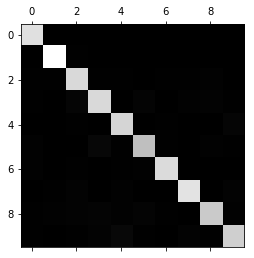

In [47]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [48]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

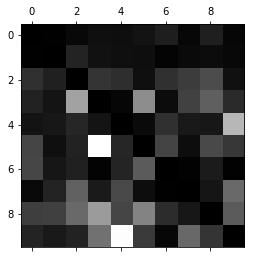

In [49]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [50]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 0)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
knn_clf.predict([some_digit])

array([[False, False]], dtype=bool)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average='macro')

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))

X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test


In [ ]:
plt.imshow(X_test_mod[20000], cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[20000]])

In [ ]:
plt.imshow(clean_digit, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()